# EML Decomposition for Likelihood-free Inference

### Combined EML for multiple sensors

This notebook will follow the notation used in R. Barlow's [*Extended maximum likelihood*](https://www.sciencedirect.com/science/article/pii/0168900290913348) and J. Lanfranchi's [*Likelihoods for Retro*](https://github.com/IceCubeOpenSource/retro/blob/master/notebooks/likelihood_function_derivation.ipynb) unless otherwise stated.

Barlow's Equation 5 expresses the extended likelihood as follows:

$L=\left[ \prod_{i=1}^{K} P(x_i) \right] e^{-\mathcal{N}}$, or 

$L=\left[ \prod_{i=1}^{K}  p(x_i) \right] \mathcal{N}^{K} e^{-\mathcal{N}}$

where $P(x_i) = \mathcal{N} p(x_i)$ and $p(x_i)$ is a probability density function (PDF) for the observable quantity $x$. Each $x_i$ is a separate observation, assumed to be drawn from the same PDF, and $\mathcal{N}$ is the expected number of observations or events. The shape of $p$ and the value of $\mathcal{N}$ are each dependent on an underlying hypothesis. When conducting parameter extraction, the underlying hypothesis is varied to optimize $L$.

In the context of photosensors, the above formulation of the extended likelihood applies most easily to a single sensor. Assuming this photosensor provides a variable length series of pulse times, the observable quantity $x$ would be the pulse time and $\mathcal{N}$ the expected number of pulses. Further, following the treatment by Lanfranchi, variable-charge hits will be accommodated by replacing $p(t_i)$ with $p(t)^{q_{d, i}}$ and $\mathcal{N}$ with $\Lambda_d$, where $q_{d, i}$ is the charge of pulse $i$ in detector $d$ and $\Lambda_d$ the total amount of charge expected in detector $d$. In this discussion, $\Lambda_d$ will include both noise and signal charge.

Therefore, the extended likelihood for sensor $d$ is

$L_d=\left[ \prod_{i} p_d\left(t_{d, i}\right)^{q_{d, i}} \right] \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}}$, 

where $Q_d = \sum_i q_{d, i}$.

Assuming the observations for each detector fluctuate independently, the extended likelihood for all sensors is a product of the respective likelihoods for each individual sensor:

$L = \prod_{d=1}^{D_{tot}} L_d$,

$L = \prod_{d=1}^{D_{tot}} \left[\left(\prod_{i=1}^{K_d} p_d\left(t_{d, i}\right)^{q_{d, i}} \right
)\Lambda_{d} ^{Q_d} e^{-\Lambda_{d}}\right]$.

### DOM(net) formulation

Rearranging the terms of the combined likelihood, one obtains

$\boxed{L = \left[\prod_{d, i} p_d\left(t_{d, i}\right)^{q_{d, i}}\right] \cdot \left[\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} \right]}$

The term on the left is a product over all observed pulses, and the term on the right is a product over all sensors, including those that have observed 0 pulses. In the context of *freeDOM*, this formulation corresponds to a DOMnet approach, where the product over pulses is handled by hitnet and the product over sensors is handled by DOMnet. Recall that, in this case, $p_{d}\left(t\right)$ is the pulse time PDF for detector $d$ and satisfies $\int p_{d} \left(t\right) dt = 1$. In principle, one could train separate hitnets for each DOM and use them to evaluate the above expression.

### Total Charge(net) formulation

Defining the quantities $Q_{tot} = \Sigma_{d,i} q_{d, i}$ and $\Lambda_{tot} = \Sigma_d \Lambda_d$, the above DOM term can be rewritten as follows:

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d}\right]  e^{-\Lambda_{tot}}$,

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i}\Lambda_{d}^{q_{d, i}}\right]  e^{-\Lambda_{tot}}$

Again, $\prod_{d,i}$ is a product over all observed pulses. Continuing,

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i} \left(\frac{\Lambda_{tot}}{\Lambda_{tot}}\right)^{q_{d, i}}\Lambda_{d}^{q_{d, i}}\right]  e^{-\Lambda_{tot}}$

$\prod_{d=1}^{D_{tot}} \Lambda_{d} ^{Q_d} e^{-\Lambda_{d}} = \left[\prod_{d,i} \left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}\right] \Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}$

The term outside of the brackets is a Poisson term for the total observed charge. Further, we are left with a number of factors of the form $\left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}$, one per pulse. These can be distributed to their associated terms in the product over all observed pulses as follows:

$L = \left[\prod_{d, i} p_d\left(t_{d, i}\right)^{q_{d, i}}\right] \cdot \left[\prod_{d,i} \left(\frac{\Lambda_{d}}{\Lambda_{tot}}\right)^{q_{d, i}}\right] \Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}$

$L = \left\{\prod_{d, i} \left[\frac{\Lambda_{d}}{\Lambda_{tot}} p_d\left(t_{d, i}\right)\right]^{q_{d, i}}\right\} \cdot \left [\Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}\right]$.

Defining $p_d^T\left(t\right) \equiv \frac{\Lambda_{d}}{\Lambda_{tot}} p_d\left(t_{d, i}\right)$, the above can be more concisely written as follows:

$\boxed{L = \left[\prod_{d, i} p^T_d\left(t_{d, i}\right)^{q_{d, i}}\right]\cdot \left [\Lambda_{tot}^{Q_{tot}} e^{-\Lambda_{tot}}\right]}$

The $T$ superscript distinguishes $p_d^T$ from $p_d$ and indicates that the former is intended to be used in the "total charge" formulation of the combined likelihood. The total charge formulation is algebraically equivalent to the DOM formulation, but groups terms in a conceptually different way. Rather than a product over all pulses and a product over all sensors, hit or not-hit, we have a product over all pulses and a single Poisson term for the total charge aggregated over all sensors. In the case where most sensors observe 0 pulses, this formulation may lend itself to more computationally efficient reconstructions. However, it is important to emphasize that the PDF used in the product over all pulses in the total charge formulation ($p_d^T$) is not the same as the one used in the DOM formulation ($p_d$). 

The change from $p_d$ to $p_d^T$ reflects the conceptual difference between the two formulations. The likelihood expressed in terms of total charge has the same structure as the single sensor likelihood, except that the "sensor" in question is the aggregate of all photosensors rather than a single photosensor. In the case of the total charge formulation, the detector index $d$ has taken the role of an observed pulse feature, similar to $t$. In fact, $p_d^T$ is a PDF in time and detector index (well, not exactly a density, but a hybrid density-mass function, given that $d$ is a discrete quantity):

$\Sigma_{d=1}^{D_{tot}} \int_t p_d^T(t) dt = \Sigma_d \frac{\Lambda_{d}}{\Lambda_{tot}} \int_t p_d(t) dt = \Sigma_d \frac{\Lambda_{d}}{\Lambda_{tot}} = 1$.

The above arguments could be repeated for any grouping of sensors, not just all or one-at-a-time. For any grouping of sensors, the PDF $p$ will have to be modified to include the expected charge fraction observed by a given sensor within the group.

## Conclusion

In conclusion, treating sensors one at a time or in groups should yield identical results provided the PDF used in the pulse term is modified appropriately. In the context of *freeDOM*, this means chargenet can not be changed independently of hitnet.

# Toy Experiment 

See P. Eller's *simple_test_case* notebook for a description of the toy experiment that will now be studied. The experiment comprises a one-dimensional array of photosensors and an isotropic light source.

In [1]:
import math

import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import numba

In [2]:
# detector positions and time resolution
detector_xs = np.linspace(-5, 5, 11)
t_std = 1

c = 0.3 # m / ns

In [3]:
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14 
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 14

In [4]:
example_x_src = 2.45
example_b_src = 1.1
example_N_src = 2.3

In [5]:
# PDFs for event generation and likelihood calculation

# numba decorators will be used for functions that are destined to be used in llh evaluations

# time PDF factory
time_dist = lambda t: stats.norm(loc=t, scale=t_std)

# (r_src - r_sensor)^2
@numba.njit
def r2(x, x_src, b_src):
    # include finite size of sensor to avoid divide by 0 when scanning (x, b)
    return (x_src-x)**2 + b_src**2 + 0.05**2

# path length from src_x, src_b to sensor at position x
@numba.njit
def path_length(x, x_src, b_src):
    return np.sqrt(r2(x, x_src, b_src))

# expected light arrival time at position x given a source at t_src, (x_src, b_src)
@numba.njit
def arrival_time(x, t_src, x_src, b_src, v=c):
    return t_src + path_length(x, x_src, b_src)/c

# returns function p_d(t) for detector at position x given source at t_src, (x_src, b_src)
def get_p_d(x, t_src, x_src, b_src):
    return time_dist(arrival_time(x, t_src, x_src, b_src))

# Lambda_d (expected charge) for detector at position x given source at (x_src, b_src) with "energy" N_src
@numba.njit
def lambda_d(x, x_src, b_src, N_src):
    return N_src/r2(x, x_src, b_src)

### Illustration of example experiment and expected pulse times and charges:

In [6]:
def plot_expectations(x_src, b_src, N_src, t_src=0):    
    t_dists = [get_p_d(x, t_src, x_src, b_src) for x in detector_xs]
    lambda_ds = lambda_d(detector_xs, x_src, b_src, N_src) 
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.4)
    
    flat_axes = axes.flat
    
    ax = next(flat_axes)
    for x_det, t_dist in zip(detector_xs, t_dists):
        mu = t_dist.mean()
        std = t_dist.std()
        times = np.linspace(mu - 3*std, mu + 3*std, 1000)
        ax.plot(times, t_dist.pdf(times), label=f'x={x_det:.0f} m')
    
    ax.set_title('$p_{d}(t)$')
    ax.set_xlabel('t (ns)')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 0.5))
    
    ax = next(flat_axes)
    for x_det, l_d in zip(detector_xs, lambda_ds):
        ax.bar([x_det], l_d)
        
    ax.set_yscale('log')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('$\Lambda_d$')
    ax.set_title('$\Lambda(x)$')
    
def plot_experiment(b, x):
    fig, ax = plt.subplots(1, 1, figsize=(12, 2))
    
    # detector positions
    ax.plot(detector_xs, np.zeros_like(detector_xs), 'ko', markersize=5, label='sensor')
    
    # light source
    ax.plot([x], [b], 'm*', markersize=15, label='light source')
    
    ax.plot([x, x], [0, b], 'k--')
    
    ax.text(x+0.15, b/2, '$b$', horizontalalignment='left', verticalalignment='center',
           fontdict={'size': 14})
    
    ax.plot([0, x], [0, b], 'k--')
    
    ax.text(x/2, b/2, '$r_0$', horizontalalignment='right', verticalalignment='bottom',
           fontdict={'size': 14})
    
    ax.set_xlabel('x (m)')
    ax.set_ylabel('y (m)')
    
    ax.legend(loc='upper left')
    
    ax.set_title('toy experiment setup')

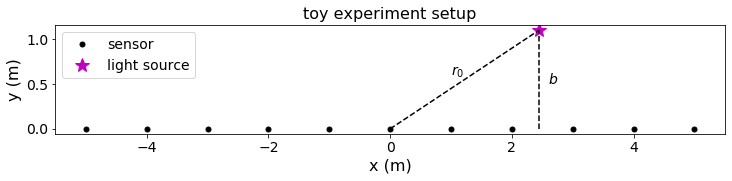

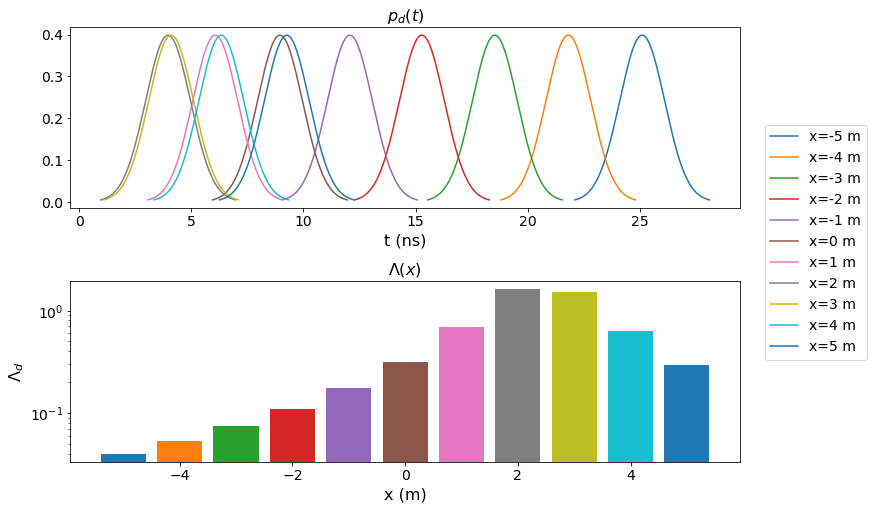

In [7]:
plot_experiment(example_b_src, example_x_src)
plt.show()
plot_expectations(example_x_src, example_b_src, example_N_src)

### Event generation code

In [8]:
def generate_event(x_src, t_src=0, N_src=10, b=1):
    '''
    generates events
    
    Parameters:
    
    x_src : float
        Source position
    t_src : float
        Source time
    N_src : int
        Amount of photons sent out
    b : float
        perpendicaulr distance off of sensor line
        
    Returns:
    
    Ns : list
        observed number of photons per detector
    Ns_sensor_idx : list
        according index of sensor
    ts : list
        observed photon times
    ts_sensor_idx : list
        according index of sensor
    '''
    Ns = []
    Ns_sensor_idx = []
    ts = []
    ts_sensor_idx = []
    for i, x in enumerate(detector_xs):
        N_exp = lambda_d(x, x_src, b, N_src)
        N_obs = stats.poisson(mu=N_exp).rvs()
        Ns.append(N_obs)
        Ns_sensor_idx.append(i)
        if N_obs > 0:
            pulse_times = get_p_d(x, t_src, x_src, b).rvs(size=N_obs)
            ts.extend(pulse_times)
            ts_sensor_idx.extend([i]*N_obs)
    return Ns, Ns_sensor_idx, ts, ts_sensor_idx

In [9]:
# generate one event and plot it
event = generate_event(x_src=example_x_src, b=example_b_src, N_src=example_N_src)

In [10]:
def plot_event(Ns, Ns_sensor_idx, ts, ts_sensor_idx, plot_expected=False,
               t_src=None, x_src=None, b_src=None, N_src=None):
    
    fig, axes = plt.subplots(nrows=2, ncols=1, figsize=(12, 8))
    plt.subplots_adjust(hspace=0.4)
    
    flat_axes = axes.flat
    
    ax = next(flat_axes)
    ts = np.array(ts)
    ts_sensor_idx = np.array(ts_sensor_idx)
    
    ax.set_title('hit times')
    ax.set_xlabel('t (ns)')
    
    color_cycle = plt.rcParams['axes.prop_cycle'].by_key()['color']
    
    for i, x_det in enumerate(detector_xs):
        sensor_times = ts[ts_sensor_idx == i]
        if len(sensor_times) > 0:
            ax.bar(sensor_times, [0.25]*len(sensor_times), width=0.1, alpha=0.5,
                  color=color_cycle[i % len(color_cycle)])
    
        
        if plot_expected:
            t_dist = get_p_d(x_det, t_src, x_src, b_src)
            mu = t_dist.mean()
            std = t_dist.std()
            times = np.linspace(mu - 3*std, mu + 3*std, 1000)
            ax.plot(times, t_dist.pdf(times))

    ax.set_yticklabels([])
    
    ax = next(flat_axes)
    for N, x_det in zip(Ns, detector_xs):
        ax.bar([x_det], [N], label=f'x={x_det:.0f} m')
    
    ax.legend(loc='upper right', bbox_to_anchor=(1.2, 1.75))
        
    if plot_expected:
        lambda_ds = lambda_d(detector_xs, x_src, b_src, N_src)
        plt_xs = [detector_xs[0] - 1] + list(detector_xs) + [detector_xs[-1] + 1]
        plt_ys = [0] + list(lambda_ds) + [0]
        ax.step(plt_xs, plt_ys, 'k--', where='mid', label='expected')
        
    ax.set_xlim(detector_xs[0]-0.5, detector_xs[-1] + 0.5)
        
    ax.set_yscale('log')
    ax.set_xlabel('x (m)')
    ax.set_ylabel('$Q_d$')
    ax.set_title('pulses per sensor')

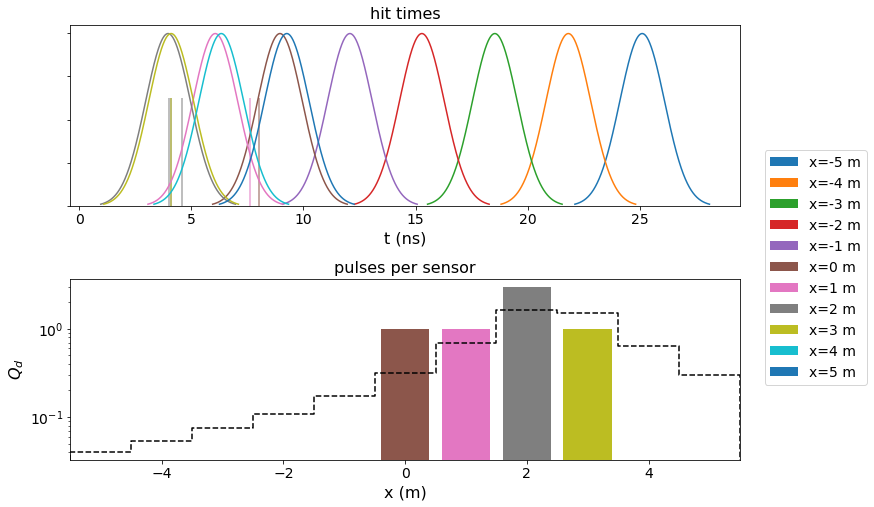

In [11]:
plot_event(*event, plot_expected=True, x_src=example_x_src, b_src=example_b_src, N_src=example_N_src, t_src=0)

### Likelihood evaluation

In [12]:
# define separate functions for DOM formulation hit term, DOM charge term, 
# total charge formulation hit term, and total charge term

# all functions will be log(L(event | x, b, t, N))

# manual logpdf of the time distribution to avoid repeated construction of scipy.stats objects
@numba.njit
def log_p_d_t(det_x, t, hypo_x, hypo_b, hypo_t):
    # drop terms that are constant wrt the hypothesis
    t_exp = arrival_time(det_x, hypo_t, hypo_x, hypo_b)
    
    # t_std could in principle vary with the hypothesis, even though it doesn't in this example
    return -(t-t_exp)**2/(2*t_std**2) + math.log(t_std)


# dom formulation

@numba.njit
def dom_hit_term(hit_times, hit_time_inds, x, b, t):
    llh = 0
   
    # t_dists = [get_p_d(det_x, t, x, b) for det_x in detector_xs]
    
    for hit_time, sensor_ind in zip(hit_times, hit_time_inds):
        llh += log_p_d_t(detector_xs[sensor_ind], hit_time, x, b, t)
    
    return llh

@numba.njit
def dom_charge_term(Ns, x, b, N_src):
    lambda_ds = lambda_d(detector_xs, x, b, N_src)
    
    return (Ns*np.log(lambda_ds) - lambda_ds).sum() 


# total charge formulation

@numba.njit
def total_charge_hit_term(hit_times, hit_time_inds, x, b, t, N_src):
    llh = 0
    
    #t_dists = [get_p_d(det_x, t, x, b) for det_x in detector_xs]
    
    lambda_ds = lambda_d(detector_xs, x, b, N_src)
    
    p_sensor = lambda_ds/lambda_ds.sum()
    
    for hit_time, sensor_ind in zip(hit_times, hit_time_inds):
        llh += log_p_d_t(detector_xs[sensor_ind], hit_time, x, b, t) + math.log(p_sensor[sensor_ind])
    
    return llh

@numba.njit
def total_charge_term(Ns, x, b, N_src):
    lambda_tot = lambda_d(detector_xs, x, b, N_src).sum()
    N_tot = np.sum(Ns)
    
    return N_tot*np.log(lambda_tot) - lambda_tot

### Generic function for LLH scans

In [13]:
@numba.njit
def llh_scan(Ns, ts, ts_sensor_idx, param_table):
    '''
    the columns of param_table shall be ordered as follows:
    hypo_xs, hypo_bs, hypo_ts, hypo_n_srcs
    
    Returns:
    
    dom_hit_terms: np.array
    
    dom_charge_terms: np.array
    
    total_charge_hit_terms: np.array
    
    total_charge_terms: np.array

    '''
    n_params = len(param_table)
    
    dom_hit_terms = np.empty(n_params)
    dom_charge_terms = np.empty(n_params)
    total_charge_hit_terms = np.empty(n_params)
    total_charge_terms = np.empty(n_params)
    
    # store -llhs, multiply everything by -1
    for i in range(param_table.shape[0]):
        hypo_x, hypo_b, hypo_t, hypo_N_src = param_table[i, :]
    
        dom_hit_terms[i] = -dom_hit_term(ts, ts_sensor_idx, hypo_x, hypo_b, hypo_t)
    
        dom_charge_terms[i] = -dom_charge_term(Ns, hypo_x, hypo_b, hypo_N_src)
    
        total_charge_hit_terms[i] = -total_charge_hit_term(ts, ts_sensor_idx, 
                                                           hypo_x, hypo_b, hypo_t, hypo_N_src)
    
        total_charge_terms[i] = -total_charge_term(Ns, hypo_x, hypo_b, hypo_N_src)
        
    return dom_hit_terms, dom_charge_terms, total_charge_hit_terms, total_charge_terms

# 2d LLH scans

In [14]:
grid_spacing = 100

In [15]:
def map_2d(Ns, ts, ts_sensor_idx,
           inds, steps, 
           base_params=np.array([example_x_src, example_b_src, 0, example_N_src])):
           
    mg = np.meshgrid(*steps)
           
    n_hypotheses = mg[0].size
     
    param_table = np.repeat(base_params[np.newaxis, :], n_hypotheses, axis=0)

    for ind, coord in zip(inds, mg):
        param_table[:, ind] = coord.flat
           
    return llh_scan(Ns, ts, ts_sensor_idx, param_table)

In [16]:
Ns, Ns_sensor_idx, ts, ts_sensor_idx = event

In [17]:
Ns = np.array(Ns)
ts = np.array(ts)
Ns_sensor_idx = np.array(Ns_sensor_idx)
ts_sensor_idx = np.array(ts_sensor_idx)

In [18]:
xs = np.linspace(-5.5, 5.5, 400)
bs = np.linspace(-2, 2, 400)

In [19]:
%%time
llh_pos_scan_res = map_2d(Ns, ts, ts_sensor_idx, (0, 1), (xs, bs))

CPU times: user 2.3 s, sys: 31.2 ms, total: 2.33 s
Wall time: 2.37 s


### 2d plotting functions

In [20]:
def colorbar(mappable):
    # from https://joseph-long.com/writing/colorbars/
    from mpl_toolkits.axes_grid1 import make_axes_locatable
    import matplotlib.pyplot as plt
    last_axes = plt.gca()
    ax = mappable.axes
    fig = ax.figure
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    cbar = fig.colorbar(mappable, cax=cax)
    plt.sca(last_axes)
    cbar.ax.tick_params(labelsize=12)
    return cbar

def plot_scan(llh_scan_res, xs, ys, true_x, true_y, axis_labels, vmaxes):
    # copy to avoid modifying original scan results
    dom_hits, dom_charge, total_hits, total_charge = np.copy(llh_scan_res)
    
    dom_terms = dom_hits, dom_charge
    
    charge_terms = total_hits, total_charge
    
    fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(16, 9))
    plt.subplots_adjust(hspace=0.3)
    plt.subplots_adjust(wspace=0.5)
    
    gridsize = len(xs)
    
    flat_axes = axes.flat
    
    for terms, label in zip((dom_terms, charge_terms), ('DOM', 'total charge')):
        ax = next(flat_axes)
        
        # subtract minimum value from each scan result
        for term in terms:
            term[:] -= term.min()
        
        m = ax.pcolormesh(xs, ys, terms[0].reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[0])
        
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} hit term')
        colorbar(m)
        
        ax = next(flat_axes)
        m = ax.pcolormesh(xs, ys, terms[1].reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[1])
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} Poisson term')
        colorbar(m)
        
        ax = next(flat_axes)
        sum_term = terms[0]+terms[1]
        sum_term = sum_term - sum_term.min()
        m = ax.pcolormesh(xs, ys, sum_term.reshape(gridsize, gridsize), 
                          cmap='Spectral', rasterized=True, linewidth=0, vmin=0, vmax=vmaxes[2])
        ax.plot([true_x], [true_y], marker='$T$', markersize=10, color='white')
        
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])
        ax.set_title(f'{label} combined llh')
        colorbar(m)

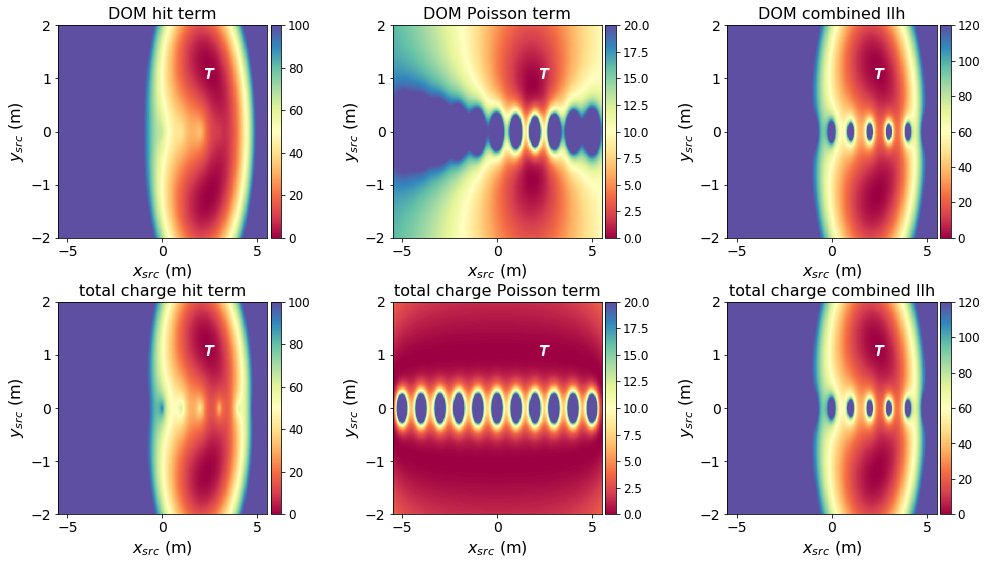

In [21]:
plot_scan(llh_pos_scan_res, xs, bs, example_x_src, example_b_src,
                   axis_labels=['$x_{src}$ (m)', '$y_{src}$ (m)'], vmaxes=[100, 20, 120])

### Verify that the two formulations are giving the same result

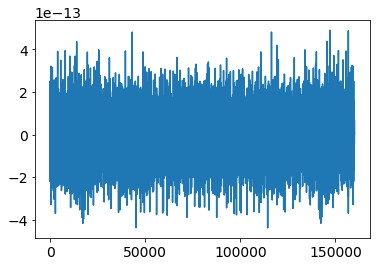

In [22]:
plt.plot(llh_pos_scan_res[0]+llh_pos_scan_res[1] - llh_pos_scan_res[2] - llh_pos_scan_res[3])

Close enough

### next, scan b and energy

In [23]:
N_srcs = np.linspace(0.01, 5, 400)
N_srcs_bs = np.linspace(-0.5, 2, 400)

In [24]:
%%time
E_b_scan_res = map_2d(Ns, ts, ts_sensor_idx, (1, 3), (N_srcs_bs, N_srcs))

CPU times: user 312 ms, sys: 15.6 ms, total: 328 ms
Wall time: 316 ms


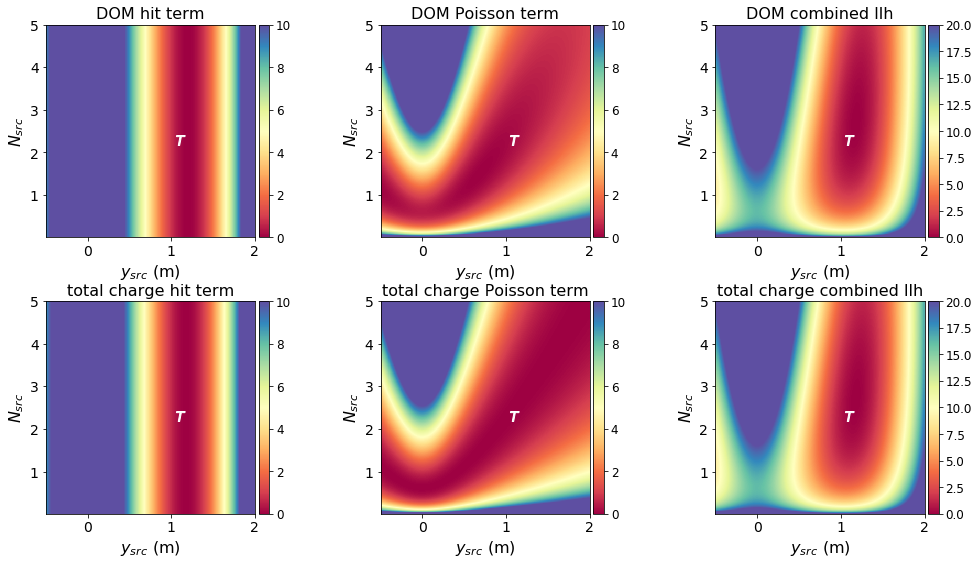

In [25]:
plot_scan(E_b_scan_res, N_srcs_bs, N_srcs, example_b_src, example_N_src,
                   axis_labels=['$y_{src}$ (m)', '$N_{src}$'], vmaxes=[10, 10, 20])

### Verify that the two formulations are giving the same result

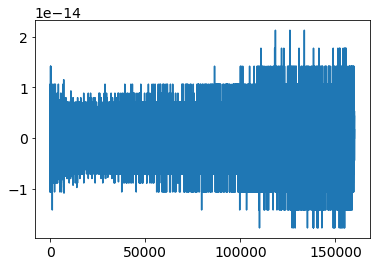

In [26]:
plt.plot(E_b_scan_res[0]+E_b_scan_res[1] - E_b_scan_res[2] - E_b_scan_res[3])

Close enough